In [131]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/koreahousedata/Daegu_Real_Estate_data.csv


In [132]:
import seaborn as sns
from matplotlib import pyplot as plt
korea_apartment_data = pd.read_csv('/kaggle/input/koreahousedata/Daegu_Real_Estate_data.csv')
korea_apartment_data

SalePrice  YearBuilt  YrSold  MonthSold  Size(sqf)  Floor HallwayType  \
0        141592       2006    2007          8        814      3    terraced   
1         51327       1985    2007          8        587      8    corridor   
2         48672       1985    2007          8        587      6    corridor   
3        380530       2006    2007          8       2056      8    terraced   
4        221238       1993    2007          8       1761      3       mixed   
...         ...        ...     ...        ...        ...    ...         ...   
5886     511504       2007    2017          8       1643     19    terraced   
5887     298230       2006    2017          8        903     13    terraced   
5888     357522       2007    2017          8        868     20    terraced   
5889     312389       1978    2017          8       1327      1    corridor   
5890     393805       2007    2017          8        868     13    terraced   

             HeatingType        AptManageType  N_Parkinglot(Ground)  ...  \
0     individual_heating  management_in_trust                 111.0  ...   
1     individual_heating      self_management                  80.0  ...   
2     individual_heating      self_management                  80.0  ...   
3     individual_heating  management_in_trust                 249.0  ...   
4     individual_heating  management_in_trust                 523.0  ...   
...                  ...                  ...                   ...  ...   
5886  individual_heating  management_in_trust                   0.0  ...   
5887  individual_heating  management_in_trust                 123.0  ...   
5888  individual_heating  management_in_trust                   0.0  ...   
5889  individual_heating      self_management                  87.0  ...   
5890  individual_heating  management_in_trust                   0.0  ...   

      N_FacilitiesNearBy(Mall) N_FacilitiesNearBy(ETC)  \
0                          1.0                     1.0   
1                          1.0                     2.0   
2                          1.0                     2.0   
3                          1.0                     0.0   
4                          1.0                     5.0   
...                        ...                     ...   
5886                       1.0                     0.0   
5887                       1.0                     2.0   
5888                       1.0                     0.0   
5889                       1.0                     0.0   
5890                       1.0                     0.0   

     N_FacilitiesNearBy(Park)  N_SchoolNearBy(Elementary)  \
0                         0.0                         3.0   
1                         1.0                         2.0   
2                         1.0                         2.0   
3                         0.0                         2.0   
4                         0.0                         4.0   
...                       ...                         ...   
5886                      2.0                         3.0   
5887                      0.0                         4.0   
5888                      2.0                         3.0   
5889                      0.0                         3.0   
5890                      2.0                         3.0   

      N_SchoolNearBy(Middle)  N_SchoolNearBy(High) N_SchoolNearBy(University)  \
0                        2.0                   2.0                        2.0   
1                        1.0                   1.0                        0.0   
2                        1.0                   1.0                        0.0   
3                        2.0                   1.0                        2.0   
4                        3.0                   5.0                        5.0   
...                      ...                   ...                        ...   
5886                     3.0                   2.0                        2.0   
5887                     3.0                   3.0                

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(korea_apartment_data, test_size=0.25, random_state=42) #3/4 training and 1/4 testing

# Data Cleaning Phase

In [134]:
X_train.columns

Index(['SalePrice', 'YearBuilt', 'YrSold', 'MonthSold', 'Size(sqf)', 'Floor',
       'HallwayType', 'HeatingType', 'AptManageType', 'N_Parkinglot(Ground)',
       'N_Parkinglot(Basement)', 'TimeToBusStop', 'TimeToSubway', 'N_APT',
       'N_manager', 'N_elevators', 'SubwayStation',
       'N_FacilitiesNearBy(PublicOffice)', 'N_FacilitiesNearBy(Hospital)',
       'N_FacilitiesNearBy(Dpartmentstore)', 'N_FacilitiesNearBy(Mall)',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(Park)',
       'N_SchoolNearBy(Elementary)', 'N_SchoolNearBy(Middle)',
       'N_SchoolNearBy(High)', 'N_SchoolNearBy(University)',
       'N_FacilitiesInApt', 'N_FacilitiesNearBy(Total)',
       'N_SchoolNearBy(Total)'],
      dtype='object')

In [135]:
lst = []
for column in X_train.columns:
    if 0 in X_train[column]:
        lst.append(column)

In [136]:
X_train.isnull().sum()

SalePrice                             0
YearBuilt                             0
YrSold                                0
MonthSold                             0
Size(sqf)                             0
Floor                                 0
HallwayType                           0
HeatingType                           0
AptManageType                         0
N_Parkinglot(Ground)                  0
N_Parkinglot(Basement)                0
TimeToBusStop                         0
TimeToSubway                          0
N_APT                                 0
N_manager                             0
N_elevators                           0
SubwayStation                         0
N_FacilitiesNearBy(PublicOffice)      0
N_FacilitiesNearBy(Hospital)          0
N_FacilitiesNearBy(Dpartmentstore)    0
N_FacilitiesNearBy(Mall)              0
N_FacilitiesNearBy(ETC)               0
N_FacilitiesNearBy(Park)              0
N_SchoolNearBy(Elementary)            0
N_SchoolNearBy(Middle)                0


It appears that there are no null values in any of the columns of the dataframe. Since there are no null values to pay attention to, the data cleaning phase is complete.

# Exploratory Data Analysis Phase

In [137]:
[type(X_train[column].iloc[0]) for column in X_train.columns]

[numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 str,
 str,
 str,
 numpy.float64,
 numpy.float64,
 str,
 str,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 str,
 numpy.float64,
 numpy.int64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.int64,
 numpy.float64,
 numpy.float64]

It appears that most of these columns are quantitative discrete/quantitative continuous.

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.]),
 <a list of 9 Text xticklabel objects>)

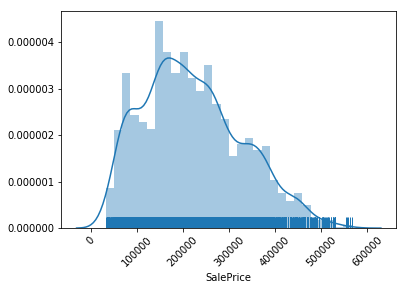

In [138]:
sns.distplot(X_train['SalePrice'], kde = True, rug = True)
plt.xticks(rotation= 45)

This distribution of sale prices is unimodal and skewed to the right(skewed towards higher numbers of sale prices).

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

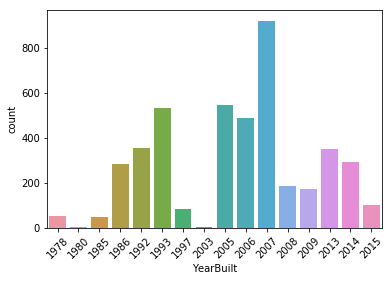

In [139]:
sns.countplot(X_train['YearBuilt'])
plt.xticks(rotation= 45)

It appears that the number of houses built in korea per year seem to increase from 1985 to 1993, and back down again until 2005. There was a slight dip in houses built from 2005 to 2006. Then there was a large spike in 2007, and the count crashed down before 2008(potentially because of the great recession). Then, there's a slight increase from 2008 to 2013, back down in 2015.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

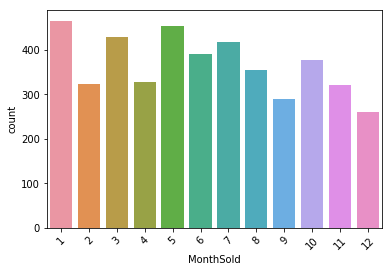

In [140]:
sns.countplot(X_train['MonthSold'])
plt.xticks(rotation= 45)

It appears months towards the beginning of the year(indicated by lower numbers) have higher counts.

In [141]:
X_train.columns

Index(['SalePrice', 'YearBuilt', 'YrSold', 'MonthSold', 'Size(sqf)', 'Floor',
       'HallwayType', 'HeatingType', 'AptManageType', 'N_Parkinglot(Ground)',
       'N_Parkinglot(Basement)', 'TimeToBusStop', 'TimeToSubway', 'N_APT',
       'N_manager', 'N_elevators', 'SubwayStation',
       'N_FacilitiesNearBy(PublicOffice)', 'N_FacilitiesNearBy(Hospital)',
       'N_FacilitiesNearBy(Dpartmentstore)', 'N_FacilitiesNearBy(Mall)',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(Park)',
       'N_SchoolNearBy(Elementary)', 'N_SchoolNearBy(Middle)',
       'N_SchoolNearBy(High)', 'N_SchoolNearBy(University)',
       'N_FacilitiesInApt', 'N_FacilitiesNearBy(Total)',
       'N_SchoolNearBy(Total)'],
      dtype='object')

In [142]:
X_train[[ 'N_Parkinglot(Basement)', 'TimeToBusStop',
       'TimeToSubway', 'N_APT', 'N_manager', 'N_elevators', 'SubwayStation',
       'N_FacilitiesNearBy(PublicOffice)', 'N_FacilitiesNearBy(Hospital)',
       'N_FacilitiesNearBy(Dpartmentstore)']]

N_Parkinglot(Basement) TimeToBusStop        TimeToSubway  N_APT  \
415                    536.0        0~5min              0-5min    6.0   
4382                   181.0    5min~10min              0-5min    3.0   
3159                  1270.0        0~5min              0-5min    7.0   
4945                   184.0    5min~10min         10min~15min    3.0   
1730                   798.0        0~5min          5min~10min    8.0   
...                      ...           ...                 ...    ...   
3772                   536.0        0~5min         15min~20min    8.0   
5191                   203.0        0~5min  no_bus_stop_nearby    1.0   
5226                   524.0        0~5min              0-5min    3.0   
5390                   798.0        0~5min          5min~10min    8.0   
860                    798.0        0~5min          5min~10min    8.0   

      N_manager  N_elevators          SubwayStation  \
415         5.0         11.0                Sin-nam   
4382        3.0         11.0              Myung-duk   
3159       14.0         16.0  Kyungbuk_uni_hospital   
4945        3.0          0.0  Kyungbuk_uni_hospital   
1730        6.0          0.0                Bangoge   
...         ...          ...                    ...   
3772        8.0         20.0              Myung-duk   
5191        2.0          5.0       no_subway_nearby   
5226        5.0         10.0             Banwoldang   
5390        6.0          0.0                Bangoge   
860         6.0          0.0                Bangoge   

      N_FacilitiesNearBy(PublicOffice)  N_FacilitiesNearBy(Hospital)  \
415                                1.0                             1   
4382                               3.0                             1   
3159                               3.0                             1   
4945                               2.0                             1   
1730                               5.0                             2   
...                                ...                           ...   
3772                               6.0                             2   
5191                               2.0                             1   
5226                               2.0                             2   
5390                               5.0                             2   
860                                5.0                             2   

      N_FacilitiesNearBy(Dpartmentstore)  
415                                  0.0  
4382                                 1.0  
3159                                 2.0  
4945                                 1.0  
1730                                 0.0  
...                                  ...  
3772                                 0.0  
5191                                 0.0  
5226                                 2.0  
5390                                 0.0  
860                                  0.0  

[4418 rows x 10 columns]

In [143]:
X_train['TimeToBusStop'].value_counts()
sales_price_grouped = X_train[['TimeToBusStop', 'SalePrice']].groupby('TimeToBusStop', as_index = False).agg(np.mean)
sales_price_grouped

TimeToBusStop      SalePrice
0        0~5min  235189.913351
1   10min~15min   58363.463415
2    5min~10min  178742.241870

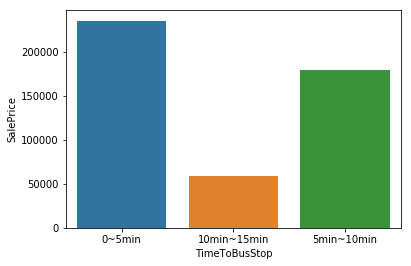

In [144]:
sns.barplot('TimeToBusStop', 'SalePrice', data = sales_price_grouped)

Clearly, this barplot demonstrates that as the approximate time to the bus stop increases, the price decreases.

In [145]:
X_train['SubwayStation'].value_counts()
sales_price_grouped = X_train[['SubwayStation', 'SalePrice']].groupby('SubwayStation', as_index = False).agg(np.mean)
sales_price_grouped = sales_price_grouped.sort_values('SalePrice', ascending = False)
sales_price_grouped

SubwayStation      SalePrice
1             Banwoldang  310747.966725
4  Kyungbuk_uni_hospital  255384.314935
6                Sin-nam  245945.624464
7       no_subway_nearby  235443.199336
0                Bangoge  166705.237569
5              Myung-duk  165790.576756
3                  Daegu  135696.359375
2       Chil-sung-market   95033.738636

In [146]:
X_train.columns

Index(['SalePrice', 'YearBuilt', 'YrSold', 'MonthSold', 'Size(sqf)', 'Floor',
       'HallwayType', 'HeatingType', 'AptManageType', 'N_Parkinglot(Ground)',
       'N_Parkinglot(Basement)', 'TimeToBusStop', 'TimeToSubway', 'N_APT',
       'N_manager', 'N_elevators', 'SubwayStation',
       'N_FacilitiesNearBy(PublicOffice)', 'N_FacilitiesNearBy(Hospital)',
       'N_FacilitiesNearBy(Dpartmentstore)', 'N_FacilitiesNearBy(Mall)',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(Park)',
       'N_SchoolNearBy(Elementary)', 'N_SchoolNearBy(Middle)',
       'N_SchoolNearBy(High)', 'N_SchoolNearBy(University)',
       'N_FacilitiesInApt', 'N_FacilitiesNearBy(Total)',
       'N_SchoolNearBy(Total)'],
      dtype='object')

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 8 Text xticklabel objects>)

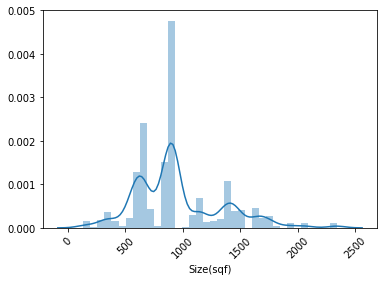

In [147]:
sns.distplot(X_train['Size(sqf)'])
plt.xticks(rotation= 45)

The distribution of square footage of houses appears to be unimodal, and skewed to the right(skewed towards higher square foot numbers). There are many gaps in square footage values.

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 <a list of 8 Text xticklabel objects>)

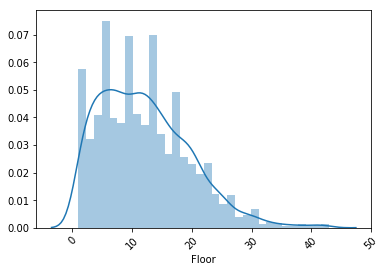

In [148]:
sns.distplot(X_train['Floor'])
plt.xticks(rotation= 45)

The distribution of the floor locations of apartment units is multimodal, and skewed to the right(higher values of Floor).

In [149]:
print(X_train['HallwayType'].value_counts())
avg_price_per_hallway_type = X_train[['HallwayType', 'SalePrice']].groupby('HallwayType', as_index = False).agg(np.mean)
avg_price_per_hallway_type

terraced    2646
mixed       1276
corridor     496
Name: HallwayType, dtype: int64


HallwayType      SalePrice
0    corridor   88628.026210
1       mixed  156239.763323
2    terraced  277004.234694

It appears that the average price of apartments with the terraced hallway type is higher than the average price of apartments with mixed and corridor hallway types respectively.

There are three different types of hallway types: terraced, mixed, and corridor. 

In [150]:
print(X_train['AptManageType'].value_counts())
avg_price_per_manage_type = X_train[['AptManageType', 'SalePrice']].groupby('AptManageType', as_index = False).agg(np.mean)
avg_price_per_manage_type

management_in_trust    4161
self_management         257
Name: AptManageType, dtype: int64


AptManageType      SalePrice
0  management_in_trust  227228.433790
1      self_management  119755.373541

In [151]:
korea_apartment_data.columns

Index(['SalePrice', 'YearBuilt', 'YrSold', 'MonthSold', 'Size(sqf)', 'Floor',
       'HallwayType', 'HeatingType', 'AptManageType', 'N_Parkinglot(Ground)',
       'N_Parkinglot(Basement)', 'TimeToBusStop', 'TimeToSubway', 'N_APT',
       'N_manager', 'N_elevators', 'SubwayStation',
       'N_FacilitiesNearBy(PublicOffice)', 'N_FacilitiesNearBy(Hospital)',
       'N_FacilitiesNearBy(Dpartmentstore)', 'N_FacilitiesNearBy(Mall)',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(Park)',
       'N_SchoolNearBy(Elementary)', 'N_SchoolNearBy(Middle)',
       'N_SchoolNearBy(High)', 'N_SchoolNearBy(University)',
       'N_FacilitiesInApt', 'N_FacilitiesNearBy(Total)',
       'N_SchoolNearBy(Total)'],
      dtype='object')

Value counts for multiple quantitative discrete variables.

In [152]:
print(X_train['N_FacilitiesNearBy(Mall)'].value_counts())
avg_price_per_mall_facilities = X_train[['N_FacilitiesNearBy(Mall)', 'SalePrice']].groupby('N_FacilitiesNearBy(Mall)', as_index = False).agg(np.mean)
avg_price_per_mall_facilities

1.0    3695
0.0     488
2.0     235
Name: N_FacilitiesNearBy(Mall), dtype: int64


N_FacilitiesNearBy(Mall)      SalePrice
0                       0.0  213099.137295
1                       1.0  218919.951286
2                       2.0  269672.531915

In [153]:
X_train['N_FacilitiesNearBy(ETC)'].value_counts()

0.0    1934
5.0    1469
1.0     681
2.0     334
Name: N_FacilitiesNearBy(ETC), dtype: int64

In [154]:
X_train['N_FacilitiesNearBy(Park)'].value_counts()

0.0    1989
1.0    1979
2.0     450
Name: N_FacilitiesNearBy(Park), dtype: int64

In [155]:
X_train['N_SchoolNearBy(Elementary)'].value_counts()

3.0    1557
4.0    1475
2.0    1239
0.0      89
6.0      58
Name: N_SchoolNearBy(Elementary), dtype: int64

In [156]:
X_train['N_SchoolNearBy(Middle)'].value_counts()

3.0    1859
2.0    1070
1.0     769
4.0     543
0.0     177
Name: N_SchoolNearBy(Middle), dtype: int64

In [157]:
X_train['N_SchoolNearBy(High)'].value_counts()

2.0    1426
1.0     991
5.0     926
4.0     657
3.0     241
0.0     177
Name: N_SchoolNearBy(High), dtype: int64

In [158]:
X_train['N_SchoolNearBy(University)'].value_counts()

2.0    1428
5.0     926
1.0     875
4.0     657
3.0     436
0.0      96
Name: N_SchoolNearBy(University), dtype: int64

In [159]:
X_train['N_FacilitiesInApt'].value_counts()

4     1105
7      907
5      872
10     585
3      516
8      186
9      153
2       53
1       41
Name: N_FacilitiesInApt, dtype: int64

In [160]:
X_train['N_FacilitiesNearBy(Total)'].value_counts()

9.0     1608
14.0     684
13.0     631
6.0      455
7.0      256
16.0     242
3.0      222
8.0      166
11.0      58
0.0       48
12.0      48
Name: N_FacilitiesNearBy(Total), dtype: int64

In [161]:
X_train['N_SchoolNearBy(Total)'].value_counts()

17.0    926
15.0    543
11.0    531
5.0     495
10.0    450
9.0     340
7.0     310
8.0     288
6.0     226
14.0    114
13.0     58
0.0      48
4.0      48
1.0      41
Name: N_SchoolNearBy(Total), dtype: int64

Let's create dummy variables for the categorical variables so that they can potentially be used as inputs to our model.

In [162]:
X_train = pd.get_dummies(X_train, columns=['HallwayType', 'HeatingType', 'AptManageType', 'TimeToBusStop',
       'TimeToSubway', 'SubwayStation'])
X_test = pd.get_dummies(X_test, columns=['HallwayType', 'HeatingType', 'AptManageType', 'TimeToBusStop',
       'TimeToSubway', 'SubwayStation'])

In [163]:
len(X_train)

4418

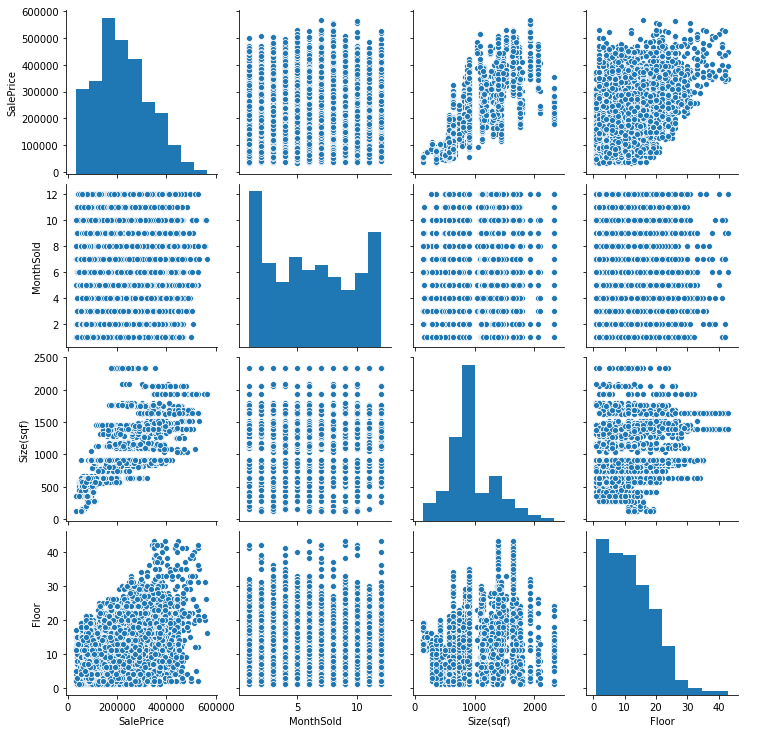

In [164]:
X_train_features = X_train[['SalePrice', 'MonthSold', 'Size(sqf)', 'Floor']]
sns.pairplot(X_train_features)

Based on this pairplot, there is a positive linear association between Size(sqf) and Sales Price. There is also a positive linear association between Floor and SalePrice. This means that Size(sqft) and Floor may be reliable predictors for Sales Price(even though there appears to be in heteroskedacity in the Sales Price versus Floor scatterplot). 

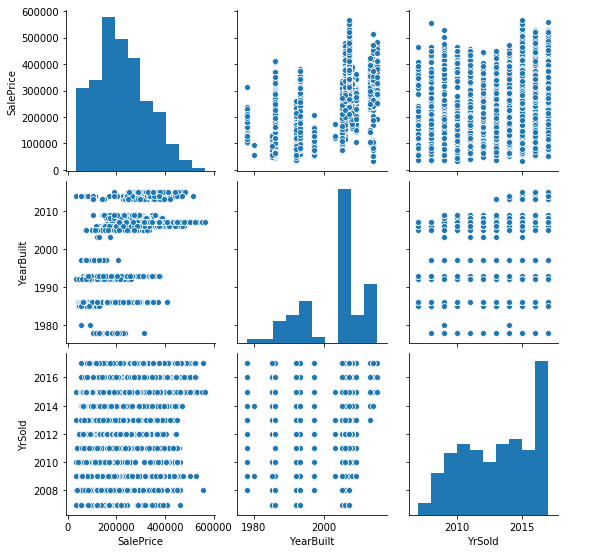

In [166]:
X_train_features2 = X_train[['SalePrice', 'YearBuilt', 'YrSold']]
sns.pairplot(X_train_features2)

In the scatterplot of SalesPrice versus YearBuilt, there appears to be a weak positive association between these two variables. That is why YearBuilt could be a reliable feature in predicting the label, Sale Price

In [168]:
X_train.columns

Index(['SalePrice', 'YearBuilt', 'YrSold', 'MonthSold', 'Size(sqf)', 'Floor',
       'N_Parkinglot(Ground)', 'N_Parkinglot(Basement)', 'N_APT', 'N_manager',
       'N_elevators', 'N_FacilitiesNearBy(PublicOffice)',
       'N_FacilitiesNearBy(Hospital)', 'N_FacilitiesNearBy(Dpartmentstore)',
       'N_FacilitiesNearBy(Mall)', 'N_FacilitiesNearBy(ETC)',
       'N_FacilitiesNearBy(Park)', 'N_SchoolNearBy(Elementary)',
       'N_SchoolNearBy(Middle)', 'N_SchoolNearBy(High)',
       'N_SchoolNearBy(University)', 'N_FacilitiesInApt',
       'N_FacilitiesNearBy(Total)', 'N_SchoolNearBy(Total)',
       'HallwayType_corridor', 'HallwayType_mixed', 'HallwayType_terraced',
       'HeatingType_central_heating', 'HeatingType_individual_heating',
       'AptManageType_management_in_trust', 'AptManageType_self_management',
       'TimeToBusStop_0~5min', 'TimeToBusStop_10min~15min',
       'TimeToBusStop_5min~10min', 'TimeToSubway_0-5min',
       'TimeToSubway_10min~15min', 'TimeToSubway_15min~20min',

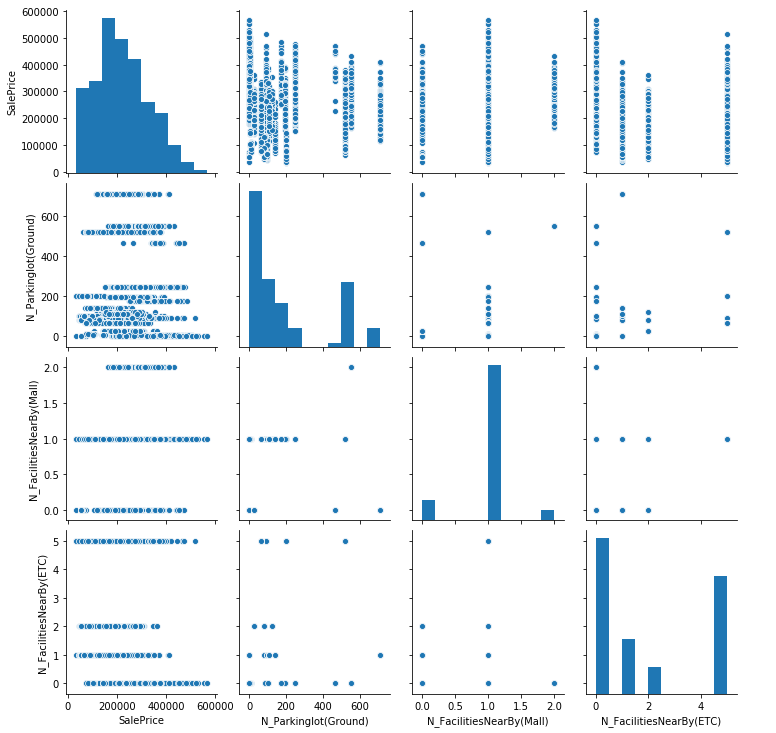

In [30]:
X_train_features3 = X_train[['SalePrice', 'N_Parkinglot(Ground)', 'N_FacilitiesNearBy(Mall)', 'N_FacilitiesNearBy(ETC)']]
sns.pairplot(X_train_features3)

There is a weak positive association between N_FacilitiesNearBy(Mall) and SalePrice, so it may be unlikely that this feature is a useful predictor of SalePrice. There is also a weak positive association between N_Parkinglot(Ground) and Sales Price, which is slightly stronger than the previous association.

In [87]:
X_train.columns

Index(['index', 'SalePrice', 'YearBuilt', 'YrSold', 'MonthSold', 'Size(sqf)',
       'Floor', 'HallwayType', 'HeatingType', 'AptManageType',
       'N_Parkinglot(Ground)', 'N_Parkinglot(Basement)', 'TimeToBusStop',
       'TimeToSubway', 'N_APT', 'N_manager', 'N_elevators', 'SubwayStation',
       'N_FacilitiesNearBy(PublicOffice)', 'N_FacilitiesNearBy(Hospital)',
       'N_FacilitiesNearBy(Dpartmentstore)', 'N_FacilitiesNearBy(Mall)',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(Park)',
       'N_SchoolNearBy(Elementary)', 'N_SchoolNearBy(Middle)',
       'N_SchoolNearBy(High)', 'N_SchoolNearBy(University)',
       'N_FacilitiesInApt', 'N_FacilitiesNearBy(Total)',
       'N_SchoolNearBy(Total)'],
      dtype='object')

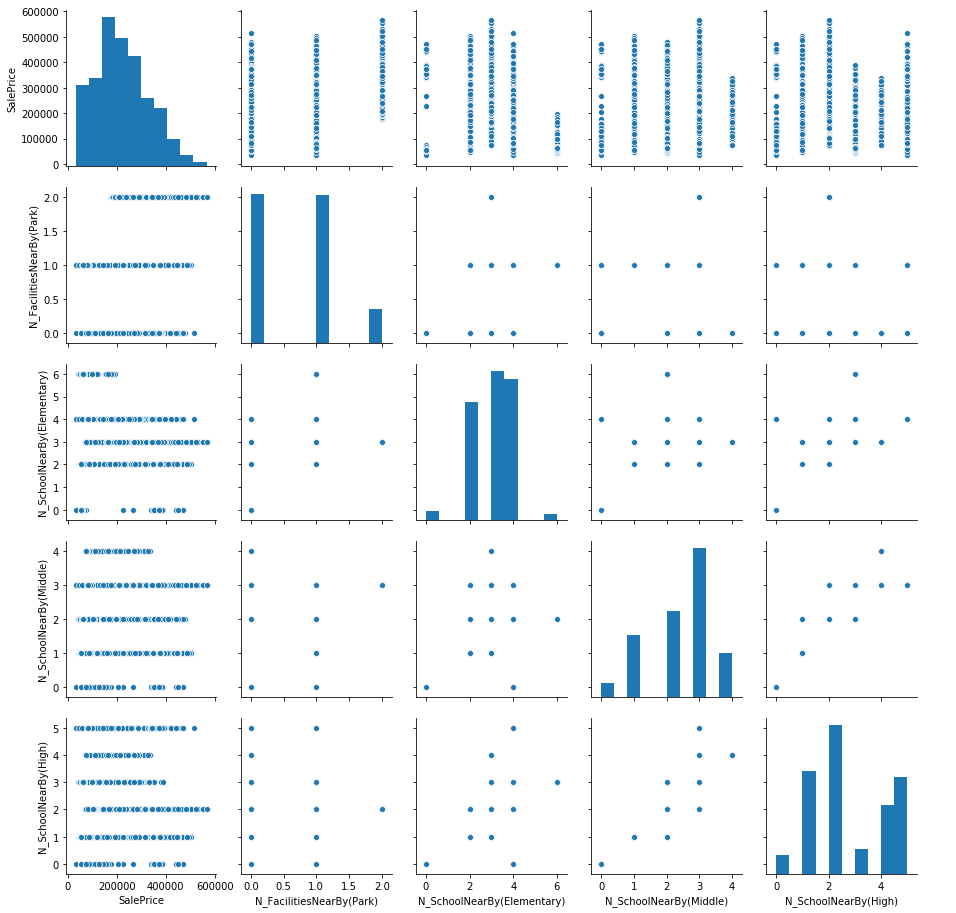

In [169]:
X_train_features4 = X_train[['SalePrice', 'N_FacilitiesNearBy(Park)', 'N_SchoolNearBy(Elementary)', 'N_SchoolNearBy(Middle)', 'N_SchoolNearBy(High)']]
sns.pairplot(X_train_features4)

There is no association between SalePrice and N_FacilitiesNearBy(Park), N_SchoolNearBy(Elementary), N_SchoolNearBy(Middle) respectively.

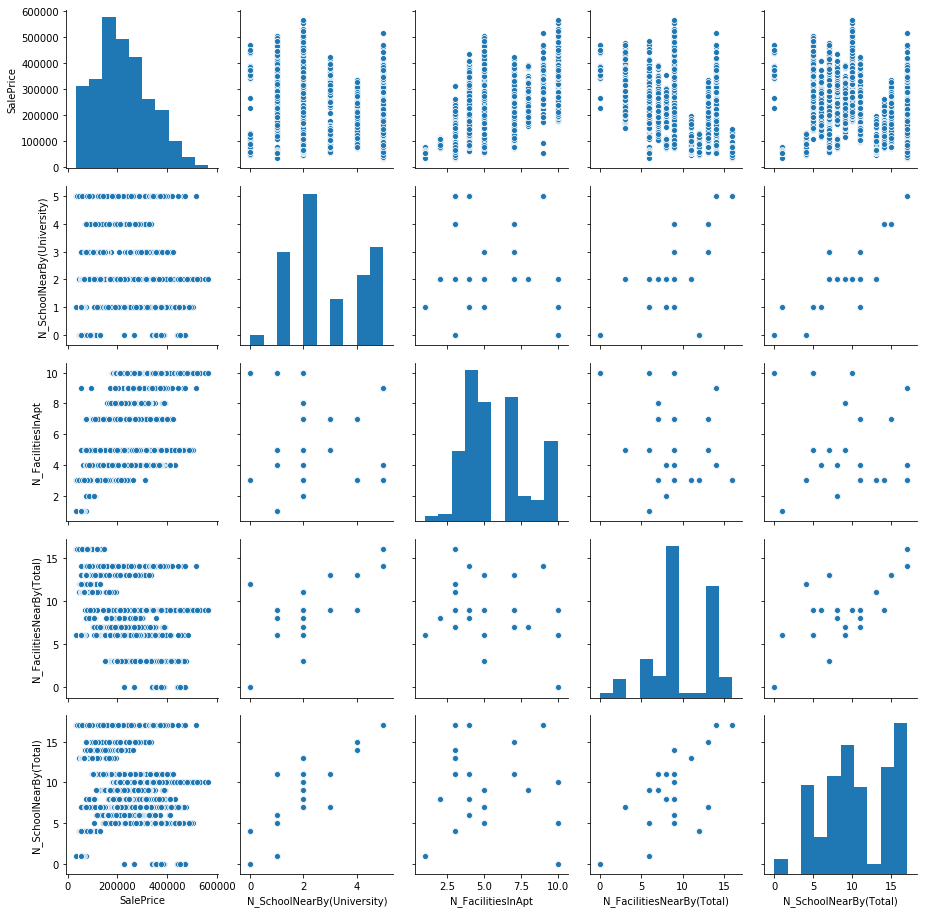

In [32]:
X_train_features5 = X_train[['SalePrice', 'N_SchoolNearBy(University)', 'N_FacilitiesInApt', 'N_FacilitiesNearBy(Total)', 'N_SchoolNearBy(Total)']]
sns.pairplot(X_train_features5)

There appears to be a moderate positive association between N_FacilitiesApt and SalePrice. This means that this feature(N_FacilitiesApt) could be a reliable predictor of the label which is SalePrice.

In short, based on the pairwise plots between the features and the label SalesPrice:
there is a positive linear association between:

SalePrice and Size(sqf), 

SalePrice and Floor

SalePrice and YearBuilt

SalePrice and N_Parkinglot(Ground)

SalePrice and N_FacilitiesInApt

However, after one-hot encoding of the categorical features, there may be other positive associations between those respective features and the label which is SalePrice.

# Model Development Phase

Least Squares Linear Regression

In [171]:
X_train = X_train.reset_index()
X_train

index  SalePrice  YearBuilt  YrSold  MonthSold  Size(sqf)  Floor  \
0       415     230088       2006    2008         10       1149     12   
1      4382     271681       2006    2015          7        903      4   
2      3159     338938       2007    2013          9       1643     14   
3      4945     236725       2006    2016          6        636      6   
4      1730     142477       2005    2011          1        743     16   
...     ...        ...        ...     ...        ...        ...    ...   
4413   3772     176548       1993    2014          9        644     11   
4414   5191     274336       2009    2016         11        910      2   
4415   5226     314159       2007    2016         11       1103      6   
4416   5390     271681       2005    2017          3        914     14   
4417    860     166371       2005    2009          8        914     19   

      N_Parkinglot(Ground)  N_Parkinglot(Basement)  N_APT  ...  \
0                    249.0                   536.0    6.0  ...   
1                    123.0                   181.0    3.0  ...   
2                      0.0                  1270.0    7.0  ...   
3                    111.0                   184.0    3.0  ...   
4                     67.0                   798.0    8.0  ...   
...                    ...                     ...    ...  ...   
4413                 523.0                   536.0    8.0  ...   
4414                  25.0                   203.0    1.0  ...   
4415                 554.0                   524.0    3.0  ...   
4416                  67.0                   798.0    8.0  ...   
4417                  67.0                   798.0    8.0  ...   

      TimeToSubway_5min~10min  TimeToSubway_no_bus_stop_nearby  \
0                           0                                0   
1                           0                                0   
2                           0                                0   
3                           0                                0   
4                           1                                0   
...                       ...                              ...   
4413                        0                                0   
4414                        0                                1   
4415                        0                                0   
4416                        1                                0   
4417                        1                                0   

      SubwayStation_Bangoge  SubwayStation_Banwoldang  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         1                         0   
...                     ...                       ...   
4413                      0                         0   
4414                      0                         0   
4415                      0                         1   
4416                      1                         0   
4417                      1                         0   

      SubwayStation_Chil-sung-market  SubwayStation_Daegu  \
0                                  0                    0   
1                                  0                    0   
2                                  0                    0   
3                                  0                    0   
4                                  0                    0   
...                              ...                  ...   
4413                               0                    0   
4414                               0                    0   
4415                               0                    0   
4416                               0                    0   
4417                               0                    0   

      SubwayStation_Kyungbuk_uni_hospital  SubwayStation_Myung-duk  \
0                                       0  

In [172]:
X_train.head()

index  SalePrice  YearBuilt  YrSold  MonthSold  Size(sqf)  Floor  \
0    415     230088       2006    2008         10       1149     12   
1   4382     271681       2006    2015          7        903      4   
2   3159     338938       2007    2013          9       1643     14   
3   4945     236725       2006    2016          6        636      6   
4   1730     142477       2005    2011          1        743     16   

   N_Parkinglot(Ground)  N_Parkinglot(Basement)  N_APT  ...  \
0                 249.0                   536.0    6.0  ...   
1                 123.0                   181.0    3.0  ...   
2                   0.0                  1270.0    7.0  ...   
3                 111.0                   184.0    3.0  ...   
4                  67.0                   798.0    8.0  ...   

   TimeToSubway_5min~10min  TimeToSubway_no_bus_stop_nearby  \
0                        0                                0   
1                        0                                0   
2                        0                                0   
3                        0                                0   
4                        1                                0   

   SubwayStation_Bangoge  SubwayStation_Banwoldang  \
0                      0                         0   
1                      0                         0   
2                      0                         0   
3                      0                         0   
4                      1                         0   

   SubwayStation_Chil-sung-market  SubwayStation_Daegu  \
0                               0                    0   
1                               0                    0   
2                               0                    0   
3                               0                    0   
4                               0                    0   

   SubwayStation_Kyungbuk_uni_hospital  SubwayStation_Myung-duk  \
0                                    0                        0   
1                                    0                        1   
2                                    1                        0   
3                                    1                        0   
4                                    0                        0   

   SubwayStation_Sin-nam  SubwayStation_no_subway_nearby  
0                      1                               0  
1                      0                               0  
2                      0                               0  
3                      0                               0  
4                      0                               0  

[5 rows x 48 columns]

In [35]:
def mse(actual, predicted):
    return np.mean((actual-predicted)**2)

In [174]:
import numpy as np
from sklearn.linear_model import LinearRegression
id_column = X_train['index']
price = X_train['SalePrice'] #storing the price column in another variable
X_trained = X_train.loc[:, 'YearBuilt': 'SubwayStation_no_subway_nearby']
y_trained = price
reg = LinearRegression()
reg = reg.fit(X_trained, y_trained)
reg.coef_

array([   5427.27668553,   12789.97183487,    2186.77806628,
           140.2685058 ,    1199.70185335,    -278.48555412,
          -242.75012342,   26636.76547591,   19587.28992327,
         -3479.37581085,  -32160.19651429,   60737.82455326,
         41850.15505061,  -12946.72443055,   -6224.16854215,
        -32561.40754576,   28568.11622424,  -69462.96227006,
         50703.89561817,  -18080.34292314,   10053.37799975,
         18695.48257111,   -8271.29335079,  -22844.84125558,
         18983.32899259,    3861.51226299,    9489.16797133,
         -9489.16797133,  -54089.01564478,   54089.01564478,
         49805.98860592,  -38930.15986187,  -10875.82874405,
         48387.41752616,   73605.97533862,  -13928.50018653,
       -109322.47766874,    1257.58499049,   32911.82917912,
          5515.67949286,  -25281.9021682 ,  -21580.6343602 ,
        -70242.37475942,  -11975.86216891,   66961.88434816,
         23691.3804366 ])

In [175]:
X_train.columns

Index(['index', 'SalePrice', 'YearBuilt', 'YrSold', 'MonthSold', 'Size(sqf)',
       'Floor', 'N_Parkinglot(Ground)', 'N_Parkinglot(Basement)', 'N_APT',
       'N_manager', 'N_elevators', 'N_FacilitiesNearBy(PublicOffice)',
       'N_FacilitiesNearBy(Hospital)', 'N_FacilitiesNearBy(Dpartmentstore)',
       'N_FacilitiesNearBy(Mall)', 'N_FacilitiesNearBy(ETC)',
       'N_FacilitiesNearBy(Park)', 'N_SchoolNearBy(Elementary)',
       'N_SchoolNearBy(Middle)', 'N_SchoolNearBy(High)',
       'N_SchoolNearBy(University)', 'N_FacilitiesInApt',
       'N_FacilitiesNearBy(Total)', 'N_SchoolNearBy(Total)',
       'HallwayType_corridor', 'HallwayType_mixed', 'HallwayType_terraced',
       'HeatingType_central_heating', 'HeatingType_individual_heating',
       'AptManageType_management_in_trust', 'AptManageType_self_management',
       'TimeToBusStop_0~5min', 'TimeToBusStop_10min~15min',
       'TimeToBusStop_5min~10min', 'TimeToSubway_0-5min',
       'TimeToSubway_10min~15min', 'TimeToSubway_15mi

In [176]:
def cross_validation_regression(k, X_train, y_train, loss_func, label, id_col):
    train_subset = 0
    test_subset = 0
    k_loss_metrics = []
    y_train = y_train.to_frame()
    for i in range(k):
        X_train['id'] = id_col
        y_train['id'] = id_col
        cval_Xtest_subset = X_train.sample(frac = (1/k), replace = False, random_state = i) 
        cval_ytest_subset = y_train.sample(frac=(1/k), replace= False, random_state = i)
        X_train_rest = X_train[np.logical_not(X_train['id'].isin(cval_Xtest_subset['id']))]
        y_train_rest = y_train[np.logical_not(y_train['id'].isin(cval_ytest_subset['id']))]
        X_train = X_train.drop(columns = ['id'])
        lin_reg = LinearRegression()
        y_train_rest = y_train_rest[label]
        lin_reg = lin_reg.fit(X_train_rest, y_train_rest)
        actual = cval_ytest_subset[label]
        predicted = lin_reg.predict(cval_Xtest_subset)
        k_loss_metrics.append(loss_func(actual, predicted))
    print(k_loss_metrics)
    return np.mean(k_loss_metrics)

cval_accuracy = cross_validation_regression(5, X_trained, y_trained, mse, 'SalePrice', id_column)
cval_accuracy

[1364570260.4640894, 1468752496.3160448, 1252354212.4430356, 1160254027.247765, 1254420474.966839]


1300070294.2875547

Finally, we will use our test set to evaluate the performance of our model, using mean squared error.

In [178]:
the_price = X_test['SalePrice'] #storing the price column in another variable
X_tested = X_test.loc[:, 'YearBuilt': 'SubwayStation_no_subway_nearby']
y_tested = the_price
predictions = reg.predict(X_tested)
mse(y_tested, predictions)

1290109334.5385478

Text(0.5, 1.0, 'Model')

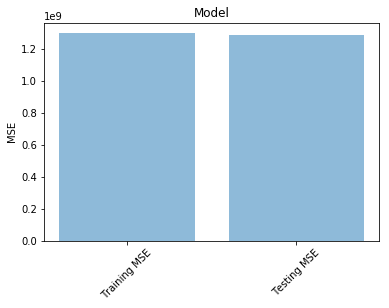

In [180]:
objects = ('Training MSE', 'Testing MSE')
y_pos = np.arange(len(objects))
performance = [cval_accuracy, mse(y_tested, predictions)]
plt.bar(y_pos, performance, align='center', alpha=0.5) 
plt.xticks(y_pos, objects)
plt.xticks(rotation= 45)
plt.ylabel('MSE')
plt.title('Model')

It appears that the testing MSE is is approximately the same as than the training MSE, so it appears that the model is clearly not ovefitting to the training set, and generalizing well to unseen data in the test set. Particularly, there are 47 features being used to predict the response variable(label), which is the house price, with a relatively high model complexity. Of course, model complexity is a relative term. Particularly, some models may tend to ovefit to the training set for a few number of features, and other such as this one would not overfit to the training set with 47 features. In this case the observation(4418) to feature(47) ratio is quite large, so that can explain why overfitting doesn't appear to be an issue. This particular least squares regression model seems to generalize reasonably well to the test data for a relatively large number of features, as there isn't much of a difference between the training MSE and the test MSE in the bar chart above.

In conclusion, the least squares regression model received an MSE of 1290109334.5385478 on the test set and MSE 1300070294.2875547 on the training set with k-fold cross validation accuracy of 5 as k, for predicting house price in dollars. Thus, these models(after further testing with unseen data) will likely be used in a production environment. We must proceed with caution however, as trends in the factors that affect house prices may change over time, so we will need to update the model with new data over time to make these predictions align with the trends. Additionally, investigation into potential model drift over time should be examined, and should be trained with new and updated data.